##**Importing Section**

In [ ]:
pip install biopython

In [27]:
import Bio 
from Bio.Seq import Seq # this one to create sequences
from Bio import SeqIO #this lib to read and files
from Bio import Entrez #Provides code to access NCBI over the WWW
from Bio import motifs #for creating motifes objects

In [49]:
#سيبك من الامبورت  دول ملناش دعوه بيهم
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

##**Start initializing**


In [35]:
seq = Seq("AGTACACTGGT")
onther_seq = "aaaggtttaacca"

##**Converting to RNA and back to DNA**<br>
notice the U nucleotide in RNA seq <br>
the protein converts every 3 nucleotides to codon, every codon is converted to single amino acid 


In [36]:
rna_seq = seq.transcribe()
dna_seq = rna_seq.back_transcribe()
protein_seq = rna_seq.translate()

print("This is the sequence:", seq)
print("Transcribted RNA Seq: ",rna_seq)
print("Back to Dna: ",dna_seq)
print("Translated RNA to protein",protein_seq)
print('---------')

This is the sequence: AGTACACTGGT
Transcribted RNA Seq:  AGUACACUGGU
Back to Dna:  AGTACACTGGT
Translated RNA to protein STL
---------


/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


- .transcribe() brings the rna from the dna single strand sequence
- .back_transcribe() brings back dna single strand sequence from rna sequence 
- notice the protein is converted to STL

# **Reading and oprating on sequence file**<br>


##Reading and oprating on dawnloaded sequence file
using SeqIO.parse to read dawnloaded sequence file

In [37]:
filename = 'sequence.fasta'
extension = 'fasta'
#print the seq id, the seq, seq name, seq description. seq report
for record in SeqIO.parse(filename, extension):
  report = repr(record)
  print(record.id)
  print(record.seq)
  print(record.name)
  print(record.description)
  print(report)

AF191665.1
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAAATGAATCTAAATGATATAGGATTCCACTATGTAAGGTCTTTGAATCATATCATAAAAGACAATGTAATAAAGCATGAATACAGATTCACACATAATTATCTGATATGAATCTATTCATAGAAAAAAGAAAAAAGTAAGAGCCTCCGGCCAATAAAGACTAAGAGGGTTGGCTCAAGAACAAAGTTCATTAAGAGCTCCATTGTAGAATTCAGACCTAATCATTAATCAAGAAGCGATGGGAACGATGTAATCCATGAATACAGAAGATTCAATTGAAAAAGATCCTATGNTCATTGGAAGGATGGCGGAACGAACCAGAGACCAATTCATCTATTCTGAAAAGTGATAAACTAATCCTATAAAACTAAAATAGATATTGAAAGAGTAAATATTCGCCCGCGAAAATTCCTTTTTTATTAAATTGCTCATATTTTCTTTTAGCAATGCAATCTAATAAAATATATCTATACAAAAAAACATAGACAAACTATATATATATATATATATAATATATTTCAAATTCCCTTATATATCCAAATATAAAAATATCTAATAAATTAGATGAATATCAAAGAATCTATTGATTTAGTGTATTATTAAATGTATATATTAATTCAATATTATTATTCTATTCATTTTTATTCATTTTCAAATTTATAATATATTAATCTATATATTAATTTAGAATTCTATTCTAATTCGAATTCAATTTTTAAATATTCATATTCAATTAAAATTGAAATTTTTTCATTCGCGAGGAGCCGGATGAGAAGAAACTCTCATGTCCGGTTCTGTAGTAGAGATGGAATTAAGAAAAAACCATCAACTATAACCCCAAAAGAACCAGA
AF191665.1
AF191665.1 Opuntia marenae rpl16 gene; chloroplast gene for chloroplast pro

- SeqIO.parse(filename, extension)
- This function reads file and returns a SeqRecord iterator.
- This lets you bring the id, seq, name, description.
- Sequence report prints the whole forementioned paramters.
- First paramter is either called filename or handler.



##Reading and oprating online sequence file<br>
- this Bio.Entrez package provides code to access NCBI website over the internet
-  NCBI website is where we bring any gene sequence.. DNA, RNA, proteins or whatever
- This module provides a number of functions like efetch (short for Entrez Fetch) which will return the data as a handle object.
- We have mentioned before it's either called file, or handler.

- use SeqIO.read() to read online files


In [38]:
#any email example to not generate an error
Entrez.email = 'example@gmail.com'

#this will create an file or record with the whole online records
handle = Entrez.efetch(db="nucleotide", id="AY851612", rettype="fasta")

#now read this file
seq_record = SeqIO.read(handle,"fasta")

seq_report = repr(seq_record)
print(seq_record.id)
print(seq_record.seq)
print(seq_record.name)
print(seq_record.description)
print(seq_report)

AY851612.1
CATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAAATGAATCTAAATGATATACGATTCCACTATGTAAGGTCTTTGAATCATATCATAAAAGACAATGTAATAAAGCATGAATACAGATTCACACATAATTATCTGATATGAATCTATTCATAGAAAAAAGAAAAAAGTAAGAGCCTCCGGCCAATAAAGACTAAGAGGGTTGGCTCAAGAACAAAGTTCATTAAGAGCTCCATTGTAGAATTCAGACCTAATCATTAATCAAGAAGCGATGGGAACGATGTAATCCATGAATACAGAAGATTCAATTGAAAAAGATCCTAATGATCATTGGGAAGGATGGCGGAACGAACCAGAGACCAATTCATCTATTCTGAAAAGTGATAAACTAATCCTATAAAACTAAAATAGATATTGAAAGAGTAAATATTCGCCCGCGAAAATTCCTTTTTTATTAAATTGCTCATATTTTATTTTAGCAATGCAATCTAATAAAATATATCTATACAAAAAAATATAGACAAACTATATATATATAATATATTTCAAATTTCCTTATATACCCAAATATAAAAATATCTAATAAATTAGATGAATATCAAAGAATCTATTGATTTAGTGTATTATTAAATGTATATCTTAATTCAATATTATTATTCTATTCATTTTTATTCATTTTCAAATTTATAATATATTAATCTATATATTAATTTATAATTCTATTCTAATTCGAATTCAATTTTTAAATATTCATATTCAATTAAAATTGAAATTTTTTCATTCGCGAGGAGCCGGATGAGAAGAAACTCTCATGTCCGGTTCTGTAGTAGAGATGGAATTAAGAAAAAACCATCAACTATAACCCCAAGAGAACCAGA
AY851612.1
AY851612.1 Opuntia subulata rpl16 gene, intron; chloroplast
SeqRecord(seq=Seq('CATTAA

Entrez.efetch(db="nucleotide", id="AY851612", rettype="fasta") <br>
- we now fetching and dawnloading sequence online..
- then we're selecting the db type, the id of the record, rettype is the file extension. 
- after this we going to read the file with SeqIO.read()

#**Motifs objects**
- We are preparing to print motifs, so all motifs should be same length.

###Creating Motif object and print length


In [39]:
instances = [Seq("TACAA"),
             Seq("TACGC"),
             Seq("TACAC"),
             Seq("TACCC"),
             Seq("AACCC"),
             Seq("AATGC"),
             Seq("AATGC")]
#lets see the uptput when printing the sequenceses list
print(instances)

[Seq('TACAA'), Seq('TACGC'), Seq('TACAC'), Seq('TACCC'), Seq('AACCC'), Seq('AATGC'), Seq('AATGC')]


>It printed as an list with the Seq object, but we want to print it as sequences not a python list:"(<br>

So here is the soultion, using motifs object we imported before..<br>
Remember, all motifs should have same length

In [40]:
motifs_seq = motifs.create(instances)
#and here we go! solved!
print(motifs_seq)

TACAA
TACGC
TACAC
TACCC
AACCC
AATGC
AATGC



In [41]:
print(len(motifs_seq))

5


###Using counts attribute of motifs
The Motif object has an attribute counts. it counts each nucleotide at each position. Printing this counts matrix shows it in an easily readable format:

In [42]:
motifs_counts = motifs_seq.counts
print(motifs_counts)

        0      1      2      3      4
A:   3.00   7.00   0.00   2.00   1.00
C:   0.00   0.00   5.00   2.00   6.00
G:   0.00   0.00   0.00   3.00   0.00
T:   4.00   0.00   2.00   0.00   0.00



- So we have 4 nucleotides letters represented in rows.
- The column names are indexes of the motifes. since the lenght of the whole motifs are 5, the index starts from 0 to 4.

####using counts output as a python dictionary

In [43]:
# all the 3 lines will print the same output
print(motifs_counts['A']) # or you can do this
print(motifs_counts['A',:]) # or this
print(motifs_counts[0,:])

[3, 7, 0, 2, 1]
(3, 7, 0, 2, 1)
(3, 7, 0, 2, 1)


- print row A in all columns from 0 to 4
> -  this means that the A showed in the first column 3 times, second column 7 times, third coulmn 0 times, and so on. 
- Instead of using the name of the nucleotide itself, you can use the index of the nucleotide in the alphabet of the motif

In [44]:
motifs_counts['A',0]

3

- this means how many A showed in column 0  

### Using consensus and anticonsensus attributes of motifs


consensus means to see which letter is more repeated in each column

In [45]:
print(motifs_counts.consensus)

TACGC


- this means T letter is the most repeated letter in first column, A in second column, C in third column and so on


anticonsensus means to see which letter is least repeated in each column

In [46]:
print(motifs_counts.anticonsensus)

CCATG


- this means C letter is the least repeated letter in first column, C in second column, A in third column and so on


###Motif logo 
can works only through online

In [47]:
motifs_seq.weblogo("mymotif.png")

- weblogo('imagename')
- it creats an graphical logo for the most and least repeated motifs letters
- it onyl works through internet connection

----------

سيبك من الكود الي جاي انا عايزه اوريك اللوجو



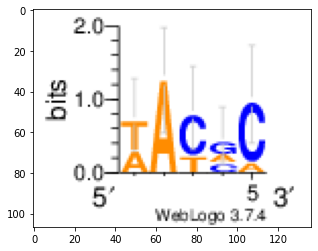

In [48]:
img = mpimg.imread('mymotif.png')
imgplot = plt.imshow(img)
plt.show()